In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Lendo os preços de fechamento de Estácio (YDUQ3.SA) e índice IBOV (^BVSP) do Yahoo Finance
assets = ['YDUQ3.SA', '^BVSP']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [3]:
pf_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2097 entries, 2012-06-18 to 2020-12-01
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   YDUQ3.SA  2097 non-null   float64
 1   ^BVSP     2089 non-null   float64
dtypes: float64(2)
memory usage: 49.1 KB


In [4]:
pf_data.head(10)

,YDUQ3.SA,^BVSP
Date,,
2012-06-18,6.004865,56195.0
2012-06-19,6.104943,57195.0
2012-06-20,5.992352,57167.0
2012-06-21,6.079926,55505.0
2012-06-22,6.004865,55440.0
2012-06-25,5.967334,53805.0
2012-06-26,6.029883,53837.0
2012-06-27,5.947316,53109.0
2012-06-28,5.949823,52652.0


In [5]:
pf_data.tail()

,YDUQ3.SA,^BVSP
Date,,
2020-11-25,30.709999,110133.000000
2020-11-26,31.580000,110227.000000
2020-11-27,31.930000,110575.000000
2020-11-30,32.779999,108888.000000
2020-12-01,35.049999,111767.046875


<AxesSubplot:xlabel='Date'>

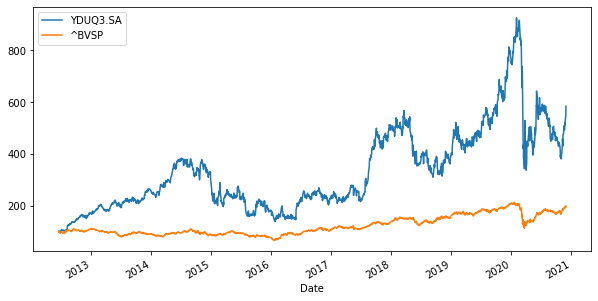

In [6]:
# Colocando os dados para base 100 e plotando o gráfico
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [7]:
# Retorno logaritmico anual
log_returns = np.log(pf_data / pf_data.shift(1))
log_returns.mean() * 250

YDUQ3.SA    0.210425
^BVSP       0.074969
dtype: float64

In [8]:
# Covariância
log_returns.cov() * 250

,YDUQ3.SA,^BVSP
YDUQ3.SA,0.239819,0.064048
^BVSP,0.064048,0.068644


In [9]:
# Correlação
log_returns.corr()

,YDUQ3.SA,^BVSP
YDUQ3.SA,1.000000,0.497673
^BVSP,0.497673,1.000000


In [10]:
# Contando o número de ativos da carteira
num_assets = len(assets)
num_assets

2

In [11]:
# Gerando dois números decimais entre 0 e 1 para os pesos
arr = np.random.random(2)
arr

array([0.26262679, 0.84742622])

In [12]:
arr[0] + arr[1]

1.1100530012111693

In [13]:
weights = np.random.random(num_assets)
weights /= np.sum(weights) # Gera dois pesos aleatórios cuja soma será sempre 1
weights

array([0.30897234, 0.69102766])

In [14]:
weights[0] + weights[1]

1.0

In [15]:
# Retorno esperado da carteira
np.sum(weights * log_returns.mean()) * 250

0.11682092949977645

In [16]:
# Variância esperada da carteira
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.08302272390262558

In [17]:
# Volatilidade esperada da carteira
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.28813664102752634

In [18]:
# COMBINAR 1000 VARIAÇÕES DA MESMA CARTEIRA
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights) # Gera dois pesos aleatórios cuja soma será sempre 1
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250) # Adiciona à lista cada valor aleatório gerado
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))
pfolio_returns, pfolio_volatilities

([0.12371833691578445,
  0.14967694763210518,
  0.13042776603127926,
  0.14511385591517753,
  0.15136418586961184,
  0.16063510346125928,
  0.15453404489947967,
  0.17987102570116204,
  0.15031204242400512,
  0.1695334368649332,
  0.13993184200405018,
  0.11944563911727062,
  0.14394912518148684,
  0.14943768415775352,
  0.16960121944922754,
  0.14459678446067592,
  0.14608031408872393,
  0.11347130938939382,
  0.07619531564934444,
  0.14854135535381993,
  0.13721251522897282,
  0.13526768234901054,
  0.18924393018095548,
  0.16345152413380448,
  0.10384572855314032,
  0.12409828411697084,
  0.1686994061558512,
  0.19542611497348336,
  0.1985112025718395,
  0.11005653088542379,
  0.14897206200170585,
  0.1520798032929414,
  0.18563298549637058,
  0.2049070745017567,
  0.13056472150752105,
  0.12522219355675576,
  0.14556880821234153,
  0.19502118721696823,
  0.16006335724518,
  0.1834784936771804,
  0.1473654063132793,
  0.17177994153252307,
  0.15491226933996993,
  0.1372803731902919,

In [19]:
# COMBINAR 1000 VARIAÇÕES DA MESMA CARTEIRA
# CONVERTIDA EM ARRAYS
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights) # Gera dois pesos aleatórios cuja soma será sempre 1
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250) # Adiciona à lista cada valor aleatório gerado
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
    
pfolio_returns, pfolio_volatilities

(array([0.15570989, 0.11398545, 0.16474227, 0.14656067, 0.16904049,
        0.14879956, 0.12136322, 0.15026465, 0.13413972, 0.17060633,
        0.17140667, 0.17993044, 0.14311858, 0.14035261, 0.11202711,
        0.15453234, 0.13711251, 0.18631143, 0.17529273, 0.09983932,
        0.14324582, 0.12685363, 0.15854305, 0.09274094, 0.160102  ,
        0.13217114, 0.0790286 , 0.16123066, 0.14717358, 0.07893395,
        0.1906237 , 0.15840266, 0.10302854, 0.07632846, 0.08193051,
        0.12860389, 0.13127797, 0.16822744, 0.11629076, 0.08986931,
        0.11284752, 0.15456466, 0.0875224 , 0.08775708, 0.13279192,
        0.15751502, 0.1945387 , 0.16676017, 0.1334697 , 0.11100627,
        0.14334389, 0.12899749, 0.20989419, 0.17310596, 0.12109178,
        0.20902198, 0.09061609, 0.12179562, 0.19309729, 0.14334508,
        0.09520654, 0.13162477, 0.19319189, 0.14549551, 0.14697505,
        0.12068644, 0.13188402, 0.1711978 , 0.18336932, 0.13501222,
        0.17325705, 0.13222491, 0.16665007, 0.09

In [20]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})
portfolios.head()

,Return,Volatility
0,0.155710,0.356719
1,0.113985,0.284537
2,0.164742,0.376531
3,0.146561,0.337889
4,0.169040,0.386331


In [21]:
portfolios.tail()

,Return,Volatility
995,0.206958,0.480559
996,0.089241,0.263967
997,0.156357,0.358101
998,0.140097,0.325454
999,0.143343,0.331603


Text(0, 0.5, 'Retorno Esperado')

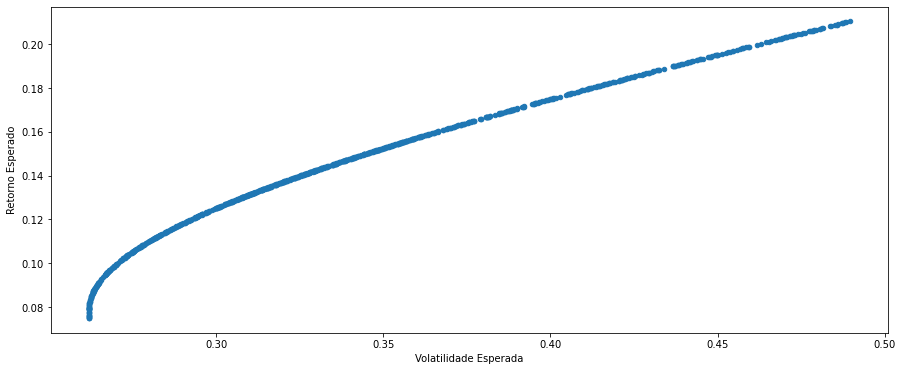

In [22]:
# Gráfico de dispensão do Retorno e Volatilidade
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(15, 6));
plt.xlabel('Volatilidade Esperada')
plt.ylabel('Retorno Esperado')